# Dataframe analysis for cleaning

In [2]:
import sys
sys.path.insert(0, "..")

In [3]:
import pandas as pd
from matplotlib import pyplot

First row as header

In [4]:
df = pd.read_csv('../Datasets/ETH.csv', header=[1])

Drop unnecessary columns

In [5]:
df.drop(columns=['symbol', 'unix', 'Volume USDT'], inplace = True)

Reindex for better plotting

In [6]:
df = df.reindex(index=df.index[::-1])

Nan count

In [7]:
df.isna().sum()

date            0
open            0
high            0
low             0
close           0
Volume ETH      0
tradecount    124
dtype: int64

In [8]:
df = df.dropna()

Date format

In [9]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

df

,date,open,high,low,close,Volume ETH,tradecount
1474,2017-12-18,707.62,798.88,638.00,784.00,45673.70777,40460.0
1473,2017-12-19,784.00,864.90,729.01,798.00,69423.62125,57020.0
1472,2017-12-20,798.00,828.00,661.00,790.21,72526.28416,58344.0
1471,2017-12-21,794.62,845.99,705.98,782.41,78222.53998,57627.0
1470,2017-12-22,784.00,796.00,504.99,635.97,154630.49482,113138.0
...,...,...,...,...,...,...,...
4,2021-12-27,4063.57,4127.46,4031.00,4037.23,222202.13830,557284.0
3,2021-12-28,4037.22,4037.23,3759.36,3792.75,358064.71630,846780.0
2,2021-12-29,3792.75,3827.78,3604.20,3630.19,302753.63750,719559.0
1,2021-12-30,3630.18,3769.10,3585.00,3709.27,249263.73050,583361.0


Charts analysis

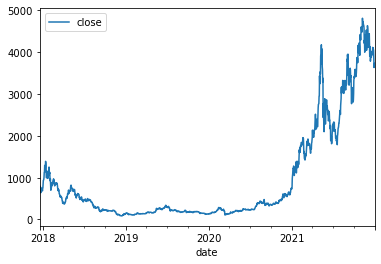

In [10]:
df.plot(x="date", y="close");

# Features analysis

In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
from data_processing import DataProcessor
import pandas as pd
import matplotlib.pyplot

Load, clean and extract features for analysis

In [3]:
processor = DataProcessor(['ETH'])
processor.load_data()
processor.clean_data('ETH')
processor.feature_extraction('ETH')
df = processor.get_data('ETH')
df


Loading... ETH
Reverse order
Drop columns
Drop Nan
Change date format


,date,open,high,low,close,Volume USDT,tradecount,High Low Difference,Open Close Difference,Result,...,MACD_signal,MACD_histo,EMA_8,EMA_20,OBV,I_tenkan_sen,I_kijun_sen,I_senkou_span_a,I_senkou_span_b,I_chikou_span
124,2017-12-18,707.62,798.88,638.00,784.00,3.279995e+07,40460.0,160.88,-76.38,0,...,0.000000,0.000000,784.000000,784.000000,NaN,NaN,NaN,NaN,NaN,1291.00
125,2017-12-19,784.00,864.90,729.01,798.00,5.512397e+07,57020.0,135.89,-14.00,0,...,0.223362,0.893447,787.111111,785.333333,8.792392e+07,NaN,NaN,NaN,NaN,1247.00
126,2017-12-20,798.00,828.00,661.00,790.21,5.560451e+07,58344.0,167.00,7.79,1,...,0.450220,0.907431,787.799753,785.797778,-1.435284e+08,NaN,NaN,NaN,NaN,1138.93
127,2017-12-21,794.62,845.99,705.98,782.41,6.205252e+07,57627.0,140.01,12.21,1,...,0.541906,0.366744,786.602030,785.475132,-2.055810e+08,NaN,NaN,NaN,NaN,1253.87
128,2017-12-22,784.00,796.00,504.99,635.97,9.866181e+07,113138.0,291.01,148.03,1,...,-1.793538,-9.341772,753.128246,771.236548,-3.042428e+08,NaN,NaN,NaN,NaN,1388.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,2021-12-27,4063.57,4127.46,4031.00,4037.23,9.055884e+08,557284.0,96.46,26.34,1,...,-67.892331,21.948105,4038.567709,4060.171814,-9.271212e+11,3951.5,4079.28,4368.1875,4790.945,NaN
1595,2021-12-28,4037.22,4037.23,3759.36,3792.75,1.393962e+09,846780.0,277.87,244.47,1,...,-66.711373,4.723832,3983.941552,4034.703069,-9.285152e+11,3951.5,4079.28,4368.1875,4790.945,NaN
1596,2021-12-29,3792.75,3827.78,3604.20,3630.19,1.136202e+09,719559.0,223.58,162.56,1,...,-70.732784,-16.085645,3905.330096,3996.178015,-9.296514e+11,3877.1,3995.84,4368.1875,4790.945,NaN
1597,2021-12-30,3630.18,3769.10,3585.00,3709.27,9.215378e+08,583361.0,184.10,-79.09,0,...,-76.381241,-22.593827,3861.761186,3968.853442,9.305729e+11,3867.5,4036.50,4163.5275,4790.945,NaN


<AxesSubplot:xlabel='date'>

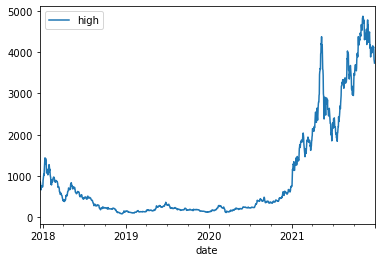

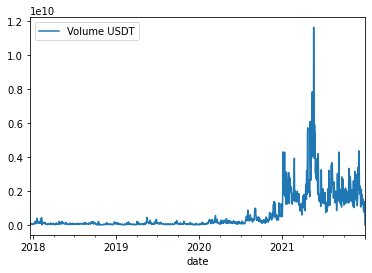

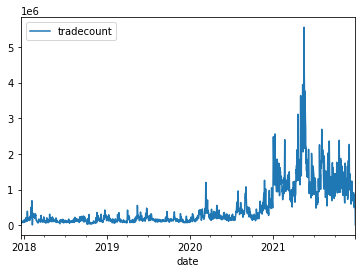

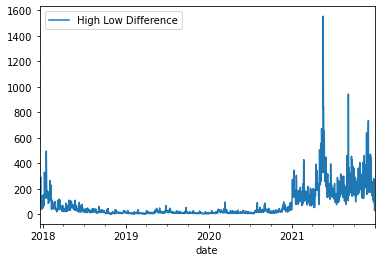

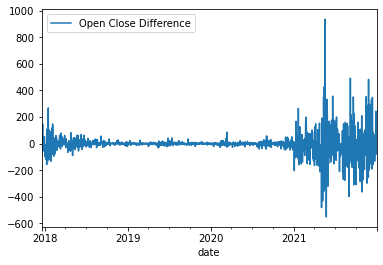

In [5]:
df.plot(x = 'date', y = 'high')
df.plot(x = 'date', y = 'Volume USDT')
df.plot(x = 'date', y = 'tradecount')
df.plot(x = 'date', y = 'High Low Difference')
df.plot(x = 'date', y = 'Open Close Difference')